## 🤔 Config

In [ ]:
#|default_exp utils.config

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()

In [ ]:
# |hide
from nbdev.showdoc import *

In [ ]:
# |hide
# |export
from copy import copy
from types import SimpleNamespace
from typing import Callable, Union, Optional, TypeVar
from contextlib import contextmanager

import numpy as np

In [ ]:
# |exporti
class Config(SimpleNamespace):
    "Config"
    def __init__(self,
            precision     = 3,    # Digits after `.`
            threshold_max = 3,    # .abs() larger than 1e3 -> Sci mode
            threshold_min = -4,   # .abs() smaller that 1e-4 -> Sci mode
            sci_mode      = None, # Sci mode (2.3e4). None=auto
            show_mem_above= 1024, # Show memory usage in b/Kb/Mb/Gb if it's larger than this
            indent        = 2,    # Indent for .deeper()
            color         = True, # ANSI colors in text
            deeper_width  =9,     # For .deeper, width per level
            repr          = None, # Use func e.g. `lovely` for `repr(np.ndarray)`
            str           = None, # Use func e.g. `lovely` for `str(np.ndarray)`
            plt_seed      = 42,   # Sampling seed for `plot`
            fig_close     = True, # Close matplotlib Figure
            fig_show      = False,# Call `plt.show()` for `.plt`, `.chans` and `.rgb`
    ):
        super().__init__(**{k:v for k,v in locals().items() if k not in ["self", "__class__"]})

_defaults = Config()
_config = copy(_defaults)

### Defaults:

In [ ]:
# |echo: false
DocmentTbl(Config)

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| precision | int | 3 | Digits after `.` |
| threshold_max | int | 3 | .abs() larger than 1e3 -> Sci mode |
| threshold_min | int | -4 | .abs() smaller that 1e-4 -> Sci mode |
| sci_mode | NoneType | None | Sci mode (2.3e4). None=auto |
| show_mem_above | int | 1024 | Show memory usage in b/Kb/Mb/Gb if it's larger than this |
| indent | int | 2 | Indent for .deeper() |
| color | bool | True | ANSI colors in text |
| deeper_width | int | 9 | For .deeper, width per level |
| repr | NoneType | None | Use func e.g. `lovely` for `repr(np.ndarray)` |
| str | NoneType | None | Use func e.g. `lovely` for `str(np.ndarray)` |
| plt_seed | int | 42 | Sampling seed for `plot` |
| fig_close | bool | True | Close matplotlib Figure |
| fig_show | bool | False | Call `plt.show()` for `.plt`, `.chans` and `.rgb` |

In [ ]:
# |exporti

# Allows passing None as an argument to reset the 
class _Default():
    def __repr__(self):
        return "Ignore"
D = _Default()
Default = TypeVar("Default")

In [ ]:
# |export
def set_config( precision       :Optional[Union[Default,int]]     =D,
                threshold_min   :Optional[Union[Default,int]]     =D,
                threshold_max   :Optional[Union[Default,int]]     =D,
                sci_mode        :Optional[Union[Default,bool]]    =D,
                show_mem_above  :Optional[Union[Default,bool]]    =D,
                indent          :Optional[Union[Default,bool]]    =D,
                color           :Optional[Union[Default,bool]]    =D,
                deeper_width    :Optional[Union[Default,int]]     =D,
                repr            :Optional[Union[Default,Callable]]=D,
                str             :Optional[Union[Default,Callable]]=D,
                plt_seed        :Optional[Union[Default,int]]     =D,
                fig_close       :Optional[Union[Default,bool]]    =D,
                fig_show        :Optional[Union[Default,bool]]    =D
                ) -> None:

    "Set config variables"
    args = locals().copy()
    for k,v in args.items():
        if v != D:
            
            # set_config(repr=func)             -> Set both `repr` and `str`.
            # set_config(repr=func, str=None)   -> Set `repr`, unset `str``
            # set_config(str=func)              -> Set `str`` only, don't tuch `repr``
            # set_config(repr=None)             -> Unset `repr`and `str``
            # set_config(str=None)              -> Unset `str` only

            if k == "repr":
                np.set_string_function(v, True)
                if args["str"] == D:
                    np.set_string_function(v, False)
            if k == "str":
                np.set_string_function(v, False)

            if v is None:
                setattr(_config, k, getattr(_defaults, k))
            else:
                setattr(_config, k, v)

In [ ]:
# |export
def get_config():
    "Get a copy of config variables"
    return copy(_config)

In [ ]:
# |export
@contextmanager
def config( precision       :Optional[Union[Default,int]]     =D,
            threshold_min   :Optional[Union[Default,int]]     =D,
            threshold_max   :Optional[Union[Default,int]]     =D,
            sci_mode        :Optional[Union[Default,bool]]    =D,
            show_mem_above  :Optional[Union[Default,bool]]    =D,
            indent          :Optional[Union[Default,bool]]    =D,
            color           :Optional[Union[Default,bool]]    =D,
            deeper_width    :Optional[Union[Default,int]]     =D,
            repr            :Optional[Union[Default,Callable]]=D,
            str             :Optional[Union[Default,Callable]]=D,
            plt_seed        :Optional[Union[Default,int]]     =D,
            fig_close       :Optional[Union[Default,bool]]    =D,
            fig_show        :Optional[Union[Default,bool]]    =D
            ):
    "Context manager for temporarily setting config options"
    new_opts = { k:v for k, v in locals().items() if v != D}
    old_opts = copy(get_config().__dict__)


    try:
        set_config(**new_opts)
        yield
    finally:
        set_config(**old_opts)

## Examples

In [ ]:
# |hide

# In the next cell I'm importing the functios from the exported .py as part of the examples code
# This overrides the functions defined above!
# Make sure the code is in sync

import nbdev; nbdev.nbdev_export()

In [ ]:
from lovely_numpy import lo, lovely, set_config, get_config, config

### Precision

In [ ]:
set_config(precision=5)
lo(np.array([1., 2, 3]))

array[3] x∈[1.00000, 3.00000] μ=2.00000 σ=0.81650 [1.00000, 2.00000, 3.00000]

### Scientific mode

In [ ]:
set_config(sci_mode=True) # Force always on
lo(np.array([1., 2, 3]))

array[3] x∈[1.00000e+00, 3.00000e+00] μ=2.00000e+00 σ=8.16497e-01 [1.00000e+00, 2.00000e+00, 3.00000e+00]

### Color on/off

In [ ]:
set_config(color=False) # Force always off
lo(np.array(np.nan))

array NaN! nan

### In-memory size of data

In [ ]:
set_config(show_mem_above=1024)
lo(np.array(np.ones((100))))

array[100] x∈[1.00000e+00, 1.00000e+00] μ=1.00000e+00 σ=0.

### Repr and str

In [ ]:
set_config(repr=lovely)
np.array([1,2])

array[2] i64 μ=1.50000e+00 σ=5.00000e-01 [1, 2]

:::{.callout-note}
I expect that most people would want `repr` and `str` to do the same thing in this context.\
Setting `repr` also sets `str`. Pass `str=None` to only set `repr`
:::

```py
set_config(repr=func)             # Set both `repr` and `str`.
set_config(repr=func, str=None)   # Set `repr`, unset `str`
set_config(str=func)              # Set `str` only, don't touch `repr`
set_config(repr=None)             # Unset `repr`and `str`
set_config(str=None)              # Unset `str` only
```

### Reser to defaults

In [ ]:
set_config(precision=None, sci_mode=None, color=None, repr=None)

In [ ]:
lo(np.array([1., 2, np.nan]))

array[3] μ=1.500 σ=0.500 NaN! [1.000, 2.000, nan]

In [ ]:
np.array([1,2])

array([1, 2])

### Context manager

In [ ]:
with config(sci_mode=True):    
    print(lo(np.array([1., 2, 3])))

array[3] x∈[1.000e+00, 3.000e+00] μ=2.000e+00 σ=8.165e-01 [1.000e+00, 2.000e+00, 3.000e+00]


In [ ]:
lo(np.array([1., 2, 3]))

array[3] x∈[1.000, 3.000] μ=2.000 σ=0.816 [1.000, 2.000, 3.000]

### Matplotlib and seed

In [ ]:
# |hide
import matplotlib

In [ ]:
# |hide
matplotlib.rcParams["svg.hashsalt"] = "1"
%config InlineBackend.print_figure_kwargs = {'metadata': {"Date": None, "Creator": "Matplotlib, https://matplotlib.org/" }}

In [ ]:
a = np.random.default_rng(seed=1).normal(size=1000)

In [ ]:
_ = lo(a).plt() # The figure was closed, it will not be displayed

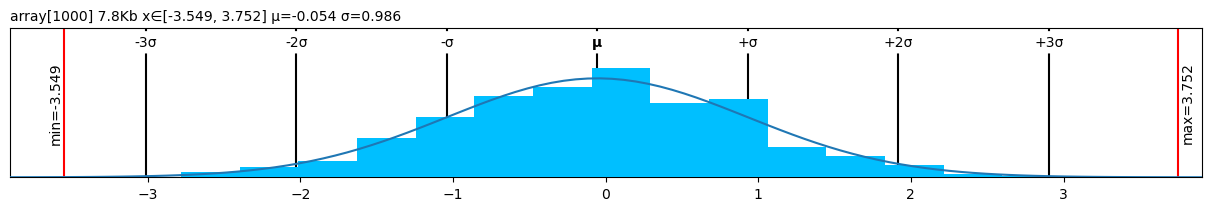

In [ ]:
set_config(fig_close=False)
_ = lo(a).plt() # figure was not closed. All figures that are not closed are displayed after the cell runs.

In [ ]:
# |hide
set_config(fig_close=None)


For performance reasons, <code>.plt</code> will randomly sample up tp `max_s` elements from the data (10k be default).

You can change the seed used for this sampling (42 by default):

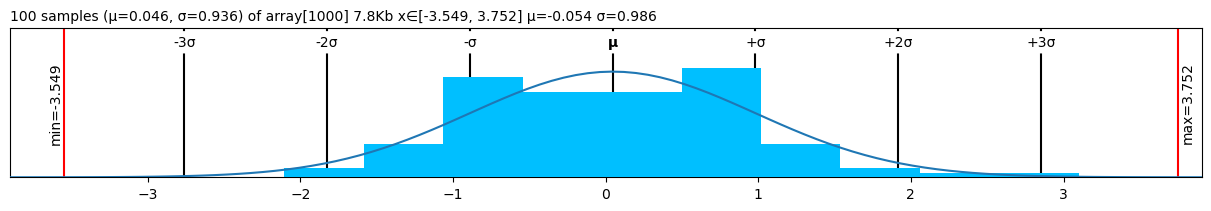

In [ ]:
set_config(plt_seed=1)
lo(a).plt(max_s=100)

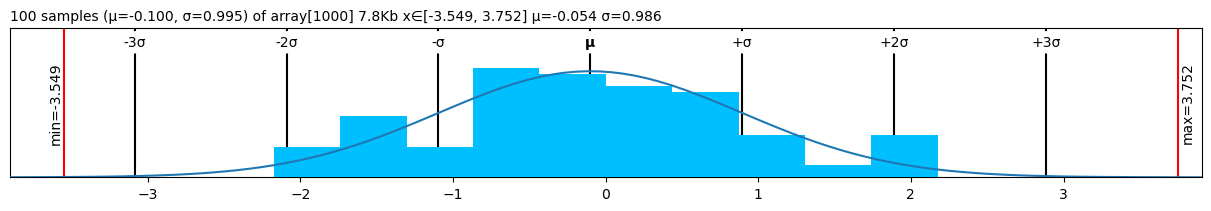

In [ ]:
set_config(plt_seed=2)
lo(a).plt(max_s=100)

More details in [matplotlib](https://xl0.github.io/lovely-numpy/matplotlib.html)